In [38]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/'

osp = MAC

In [3]:
MNET_PATH = osp+'git/molnet/code/'
sys.path.append(MNET_PATH)

## Get bad spectral matches between 2 datasets

In [4]:
import mnet
import mnet_utilities

Load the fragmentattion files.

In [5]:
mgf_vl = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/vl/frag_pos_vl.mgf')
mgf_mal = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/mal/frag_pos_mal.mgf')
mgf_zik = mnet_utilities.load_mgf(osp+'pymz/mzmine/210120/mzmine_frag/zik/gnps2.mgf')

Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra
Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra
Loaded 100 spectra
Loaded 200 spectra
Loaded 300 spectra


Get the cosine similarity scores of the bad spectral matches.

In [16]:
from metab_utils import get_bad_spectral_matches
badscores_vl_zik = get_bad_spectral_matches(mgf_vl, mgf_zik, 40, 0.2, 2, plot = False)
badscores_vl_mal = get_bad_spectral_matches(mgf_vl, mgf_mal, 40, 0.2, 2, plot = False)
badscores_zik_mal = get_bad_spectral_matches(mgf_zik, mgf_mal, 40, 0.2, 2, plot = False)

Plot the distribution of the scores for the bad spectral matches.

Text(0.5, 1.0, 'VL vs Zika')

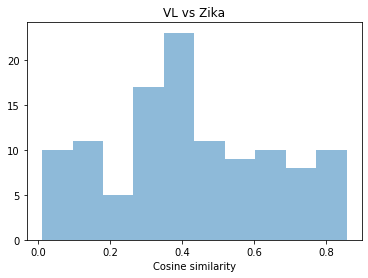

In [21]:
plt.hist(badscores_vl_zik, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('VL vs Zika')

Text(0.5, 1.0, 'VL vs Malaria')

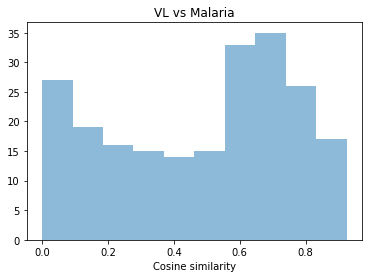

In [22]:
plt.hist(badscores_vl_mal, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('VL vs Malaria')

Text(0.5, 1.0, 'Malaria vs Zika')

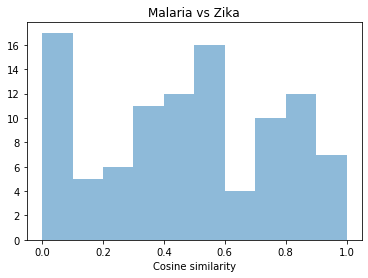

In [23]:
plt.hist(badscores_zik_mal, bins=10, alpha = 0.5)
plt.xlabel('Cosine similarity')
plt.title('Malaria vs Zika')

## Get distribution of bad spectral matches for each good match

Load the JoinAligner object.

In [ ]:
with open(os.path.join(osp,'pymz/mzmine/aligner_gp.txt'), 'rb') as file:
    aligner_gp = pickle.load(file)   

Extract the spectra from the peaksets.

In [30]:
from metab_utils import extract_peaksets_with_spectra_from_dataset
peaksets_gp_spec = extract_peaksets_with_spectra_from_dataset(aligner_gp)

Extract the scores for the peaksets which have 2 or more spectra attached.

In [ ]:
from metab_utils import extract_scores_pairs_for_dataset
peaksets_vl_mal = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'vl', 'mal')
peaksets_vl_zik = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'vl', 'zik')
peaksets_zik_mal = extract_scores_pairs_for_dataset(peaksets_gp_spec, 'zik', 'mal')

Parse through the list of actual spectral matches and for each match get a distribution of badscores.

In [31]:
from metab_utils import get_bad_scores_distribution
rtd = 31
bsvm = get_bad_scores_distribution(peaksets_vl_mal, rtd, mgf_vl, mgf_mal)
bsvz = get_bad_scores_distribution(peaksets_vl_zik, rtd, mgf_vl, mgf_zik)
bszm = get_bad_scores_distribution(peaksets_zik_mal,rtd, mgf_zik, mgf_mal)

[0.8788596654868462]
---
[0.7680224772235903, 0.7064566385408813, 0.7315291187843543]
=====
[0.19791581115707427]
---
[0.2848282465345568, 0.23643192234502497, 0.2502945220504343, 0.31097539652959877, 0.26641727877827154, 0.2804503775057586]
=====
[0.9353288454889728]
---
[]
=====
[0.911416961444581]
---
[]
=====
[0.8821529487196236]
---
[0.7112732033453955, 0.6957035916338019, 0.7057816032030155, 0.12441781032793796, 0.5240706482503515, 0.15016469365509424, 0.5890128931897507]
=====
[0.8805429008038324]
---
[0.09052575817208289]
=====
[0.020638906914758476]
---
[]
=====
[0.8156984492212396]
---
[]
=====
[0.03614809124791868]
---
[]
=====
[0.04030998594444133]
---
[0.0]
=====
[0.023675893341813126]
---
[0.07881825749583478, 0.0, 0.0633534401277063, 0.11928372307383579, 0.03167534647775286, 0.058091487716436845, 0.013534517623503977]
=====
[0.007835297864336805]
---
[0.07881825749583478, 0.0, 0.0633534401277063, 0.11928372307383579, 0.03167534647775286, 0.058091487716436845, 0.013534517

In [33]:
from metab_utils import print_threshold
print(print_threshold(bszm, peaksets_zik_mal))
print(print_threshold(bsvm, peaksets_vl_mal))
print(print_threshold(bsvz, peaksets_vl_zik))

    #higher bad score        diff #lower bad score       diff #no bad scores
0.1                 0        none                0       none              0
0.2                 0        none                0       none              0
0.3                 0        none                0       none              0
0.4                 0        none                1   0.170555              1
0.5                 0        none                0       none              1
0.6                 2   0.0153773                1  0.0188412              3
0.7                 0        none                0       none              2
0.8                 0        none                0       none              1
0.9                 1  0.00124875                1   0.463478              7
1.0                 0        none                5   0.545659             19
    #higher bad score        diff #lower bad score       diff #no bad scores
0.1                 2   0.0363525                1    0.04031              4

Calculate the mean from the distribution of the bad scores.

In [35]:
from metab_utils import calculate_overall
act_vl_mal, bs_vl_mal, rts_vl_mal, mz_vl_mal = calculate_overall(bsvm, peaksets_vl_mal)
act_vl_zik, bs_vl_zik, rts_vl_zik, mz_vl_zik = calculate_overall(bsvz, peaksets_vl_zik)
act_zik_mal, bs_zik_mal, rts_zik_mal, mz_zik_mal = calculate_overall(bszm, peaksets_zik_mal)

In [36]:
act_scores = act_vl_zik +act_vl_mal+act_zik_mal
bad_scores = bs_vl_zik +bs_vl_mal + bs_zik_mal
rts = rts_vl_zik +  rts_vl_mal +rts_zik_mal
mz = mz_vl_zik + mz_vl_mal + mz_zik_mal

(-0.02, 1.02)

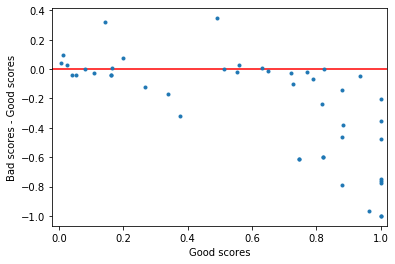

In [55]:
plt.plot(act_scores, np.array(bad_scores)[:None] -np.array(act_scores)[:None] ,  '.')
plt.hlines(0,-0.02,1.02, color='r')


plt.xlabel('Good scores')
plt.ylabel('Bad scores - Good scores')
plt.xlim(-0.02,1.02)